In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel("C:\\Users\\fl9768\\Desktop\\Data for ML\\Pullback\\Pullback_train.xlsx")

In [3]:
data.head()

,Mast name,Load case,Pullbackload,Rotation,Sectionmodulus,Stressvalue
0,DR410i SP,1PB + 1.35Rot,35703.0,122720.0,3.901175,16664.0
1,DR410i SP,1.1PB + 1.35Rot,39273.3,122720.0,3.901175,17989.0
2,DR410i SP,1.3PB + 1.35Rot,46413.9,122720.0,3.901175,20642.0
3,DR410i SP,1.4PB + 1.35Rot,49984.2,122720.0,3.901175,21969.0
4,DR410i SP,0.8PB + 1.35Rot,28562.4,122720.0,3.901175,14014.0


In [4]:
data = data.drop('Mast name', axis = 'columns')
data = data.drop('Load case', axis = 'columns')

data.head()

,Pullbackload,Rotation,Sectionmodulus,Stressvalue
0,35703.0,122720.0,3.901175,16664.0
1,39273.3,122720.0,3.901175,17989.0
2,46413.9,122720.0,3.901175,20642.0
3,49984.2,122720.0,3.901175,21969.0
4,28562.4,122720.0,3.901175,14014.0


In [5]:
from sklearn import linear_model
X_train = data[["Pullbackload", "Rotation", "Sectionmodulus"]]
y_train = data[["Stressvalue"]]

In [6]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [7]:
test_data = pd.read_excel("C:\\Users\\fl9768\\Desktop\\Data for ML\\Pullback\\Pullback_test.xlsx")
X_test = test_data[["Pullbackload", "Rotation", "Sectionmodulus"]]
y_test = test_data[["Stressvalue"]]

In [8]:
y_pred = reg.predict(X_test)

In [9]:
y_pred

array([[18987.78416613],
       [14269.15999015],
       [20585.68286269],
       [ 9241.52639882],
       [10222.56920672],
       [23995.49861163],
       [24177.59083104],
       [20845.33848783],
       [22897.15843376],
       [11097.26774775]])

In [10]:
from sklearn.metrics import mean_squared_error
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

RMSE: 583.4225850903024


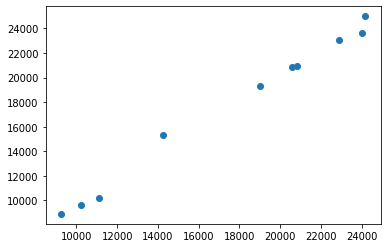

In [11]:
import matplotlib.pyplot as plt
plt.scatter(y_pred, y_test)

In [12]:
y_test['Predicted value Linear Regression'] = y_pred
y_test['Difference'] = abs(y_test['Stressvalue'] - y_test['Predicted value Linear Regression'])
y_test

C:\Users\fl9768\AppData\Local\Temp\ipykernel_14168\521760255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Predicted value Linear Regression'] = y_pred
C:\Users\fl9768\AppData\Local\Temp\ipykernel_14168\521760255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Difference'] = abs(y_test['Stressvalue'] - y_test['Predicted value Linear Regression'])


,Stressvalue,Predicted value Linear Regression,Difference
0,19316,18987.784166,328.215834
1,15338,14269.159990,1068.840010
2,20869,20585.682863,283.317137
3,8909,9241.526399,332.526399
4,9608,10222.569207,614.569207
5,23653,23995.498612,342.498612
6,24983,24177.590831,805.409169
7,20957,20845.338488,111.661512
8,23060,22897.158434,162.841566
9,10214,11097.267748,883.267748


In [13]:
print(reg.coef_)

[[ 4.40544135e-01  2.75280008e-03 -2.28000149e+03]]


In [14]:
import pickle
pickle.dump(reg, open('pullback_lr.pkl', 'wb'))

In [15]:
pullback_prediction = pickle.load(open('pullback_lr.pkl', 'rb'))
pullback_prediction.predict(X_test)

array([[18987.78416613],
       [14269.15999015],
       [20585.68286269],
       [ 9241.52639882],
       [10222.56920672],
       [23995.49861163],
       [24177.59083104],
       [20845.33848783],
       [22897.15843376],
       [11097.26774775]])